In [60]:
import sys
sys.path.insert(0, '/home/users/brezovec/.local/lib/python3.6/site-packages/lib/python/')
import ants
import os
import bigbadbrain as bbb
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy
from scipy.ndimage.filters import gaussian_filter
from scipy.ndimage.filters import gaussian_filter1d

from scipy.signal import savgol_filter
from scipy.interpolate import interp1d

from skimage.filters import threshold_triangle
sys.path.insert(0, '/home/users/brezovec/.local/lib/python3.6/site-packages')
import os
import statsmodels.api as sm
import cv2
import matplotlib.patches as mpatches
import psutil
from mpl_toolkits.axes_grid1 import ImageGrid
from matplotlib.colors import Normalize


%matplotlib inline
plt.rcParams.update({'font.size': 20})

from sklearn.feature_extraction.image import grid_to_graph
from mpl_toolkits.axes_grid1 import ImageGrid
import json
from matplotlib.ticker import FuncFormatter

import nibabel as nib

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
import itertools
import random
from scipy.cluster import hierarchy
import matplotlib as mpl
from matplotlib.pyplot import cm

from scipy.interpolate import UnivariateSpline
from sklearn.linear_model import LinearRegression
import matplotlib.patches as patches

from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV

from scipy.fftpack import fft,fftshift,ifft

import pickle

In [2]:
labels_file = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20201129_super_slices/cluster_labels.npy'
cluster_model_labels = np.load(labels_file) #z,t

In [3]:
def plot_panel(ax, z, scores1, scores2=None, title=None):
    if isinstance(z, int):
        #for plotting a single z-slice
        colored_by_betas = np.zeros(256*128)
        for cluster_num in range(len(np.unique(cluster_model_labels[z]))):
            cluster_indicies = np.where(cluster_model_labels[z]==cluster_num)[0]
            if scores2 is not None:
                colored_by_betas[cluster_indicies] = all_scores[z-9][scores1][cluster_num] - all_scores[z-9][scores2][cluster_num]
            else:
                colored_by_betas[cluster_indicies] = all_scores[z-9][scores1][cluster_num]
            if len(cluster_indicies) > 100:
                colored_by_betas[cluster_indicies] = np.nan
            if colored_by_betas[cluster_indicies][0] == 1:
                colored_by_betas[cluster_indicies] = np.nan
        colored_by_betas = colored_by_betas.reshape(256,128)
        to_plot = colored_by_betas
    else:
        all_colored_by_betas = []
        for z in range(9,49-9):
            colored_by_betas = np.zeros(256*128)
            for cluster_num in range(len(np.unique(cluster_model_labels[z]))):
                cluster_indicies = np.where(cluster_model_labels[z]==cluster_num)[0]
                if scores2 is not None:
                    colored_by_betas[cluster_indicies] = all_scores[z-9][scores1][cluster_num] - all_scores[z-9][scores2][cluster_num]
                else:
                    colored_by_betas[cluster_indicies] = all_scores[z-9][scores1][cluster_num]
                if len(cluster_indicies) > 100:
                    colored_by_betas[cluster_indicies] = 0
                if colored_by_betas[cluster_indicies][0] == 1:
                    colored_by_betas[cluster_indicies] = 0
            colored_by_betas = colored_by_betas.reshape(256,128)
            all_colored_by_betas.append(colored_by_betas)
        all_colored_by_betas = np.asarray(all_colored_by_betas)
        to_plot = np.max(all_colored_by_betas, axis=0)
    ax.imshow(to_plot.T,cmap=cmap,vmin=vmin,vmax=vmax)
    ax.axis('off')
    if title is not None:
        ax.set_title(title)

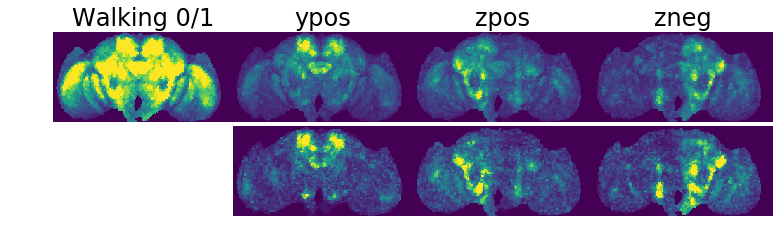

In [5]:
### SUPERFLY ###

main_dir = f'/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20210309_inst_uniq_glm_state_sub'

all_scores = []
for z in range(9,49-9):
    file = [os.path.join(main_dir, i) for i in os.listdir(main_dir) if f'Z{z}.' in i][0]
    with open(file, 'rb') as handle:
        scores = pickle.load(handle)
    all_scores.append(scores)

fig = plt.figure(figsize=(10,10))
cmap = 'viridis'

##########################
######## MAX PROJ ########
##########################
z='all'

### SINGLES ###
vmin=0
vmax=.1
# ax = fig.add_axes([0,0,.25,.25])
# plot_panel(ax, z, scores1='scores_all', scores2=None, title='all')
ax = fig.add_axes([.25,0,.25,.25])
plot_panel(ax, z, scores1='scores_walking', scores2=None, title='Walking 0/1')
ax = fig.add_axes([.5,0,.25,.25])
plot_panel(ax, z, scores1='scores_ypos', scores2=None, title='ypos')
ax = fig.add_axes([.75,0,.25,.25])
plot_panel(ax, z, scores1='scores_zpos', scores2=None, title='zpos')
ax = fig.add_axes([1,0,.25,.25])
plot_panel(ax, z, scores1='scores_zneg', scores2=None, title='zneg')

### UNIQUE ###
vmin=0
vmax=.05
# ax = fig.add_axes([.25,-.13,.25,.25])
# plot_panel(ax, z, scores1='scores_all', scores2='scores_walking_unique')
ax = fig.add_axes([.5,-.13,.25,.25])
plot_panel(ax, z, scores1='scores_all', scores2='scores_ypos_unique')
ax = fig.add_axes([.75,-.13,.25,.25])
plot_panel(ax, z, scores1='scores_all', scores2='scores_zpos_unique')
ax = fig.add_axes([1,-.13,.25,.25])
plot_panel(ax, z, scores1='scores_all', scores2='scores_zneg_unique')

# ########################################
# ######## EXAMPLE SINGLE SLICE ##########
# ########################################
# z=20

# ### SINGLES ###
# vmin=0
# vmax=.1
# # ax = fig.add_axes([0,-.26,.25,.25])
# # plot_panel(ax, z, scores1='scores_all', scores2=None)
# ax = fig.add_axes([.25,-.26,.25,.25])
# plot_panel(ax, z, scores1='scores_walking', scores2=None)
# ax = fig.add_axes([.5,-.26,.25,.25])
# plot_panel(ax, z, scores1='scores_ypos', scores2=None)
# ax = fig.add_axes([.75,-.26,.25,.25])
# plot_panel(ax, z, scores1='scores_zpos', scores2=None)
# ax = fig.add_axes([1,-.26,.25,.25])
# plot_panel(ax, z, scores1='scores_zneg', scores2=None)

# ### UNIQUE ###
# vmin=0
# vmax=.05
# # ax = fig.add_axes([.25,-.39,.25,.25])
# # plot_panel(ax, z, scores1='scores_all', scores2='scores_walking_unique')
# ax = fig.add_axes([.5,-.39,.25,.25])
# plot_panel(ax, z, scores1='scores_all', scores2='scores_ypos_unique')
# ax = fig.add_axes([.75,-.39,.25,.25])
# plot_panel(ax, z, scores1='scores_all', scores2='scores_zpos_unique')
# ax = fig.add_axes([1,-.39,.25,.25])
# plot_panel(ax, z, scores1='scores_all', scores2='scores_zneg_unique')

### SAVE ###
#plt.suptitle(f'Superfly {num_pcs} PCs',y=0,x=.1,fontsize=12)
save_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/figs'
timestr = time.strftime("%Y%m%d-%H%M%S")
fname = os.path.join(save_path, f'{timestr}')
#plt.savefig(fname,dpi=300,bbox_inches='tight')

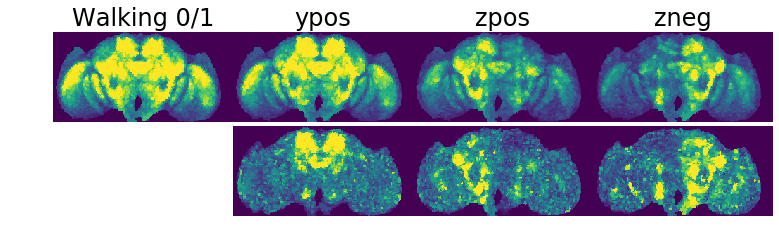

In [9]:
### SUPERFLY ###

#main_dir = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20210309_inst_uniq_glm_state_sub'
main_dir = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20210208_inst_uniq_glm'


all_scores = []
for z in range(9,49-9):
    file = [os.path.join(main_dir, i) for i in os.listdir(main_dir) if f'Z{z}.' in i][0]
    with open(file, 'rb') as handle:
        scores = pickle.load(handle)
    all_scores.append(scores)

fig = plt.figure(figsize=(10,10))
cmap = 'viridis'

##########################
######## MAX PROJ ########
##########################
z='all'

### SINGLES ###
vmin=0
vmax=.1
# ax = fig.add_axes([0,0,.25,.25])
# plot_panel(ax, z, scores1='scores_all', scores2=None, title='all')
ax = fig.add_axes([.25,0,.25,.25])
plot_panel(ax, z, scores1='scores_walking', scores2=None, title='Walking 0/1')
ax = fig.add_axes([.5,0,.25,.25])
plot_panel(ax, z, scores1='scores_ypos', scores2=None, title='ypos')
ax = fig.add_axes([.75,0,.25,.25])
plot_panel(ax, z, scores1='scores_zpos', scores2=None, title='zpos')
ax = fig.add_axes([1,0,.25,.25])
plot_panel(ax, z, scores1='scores_zneg', scores2=None, title='zneg')

### UNIQUE ###
vmin=0
vmax=.02
# ax = fig.add_axes([.25,-.13,.25,.25])
# plot_panel(ax, z, scores1='scores_all', scores2='scores_walking_unique')
ax = fig.add_axes([.5,-.13,.25,.25])
plot_panel(ax, z, scores1='scores_all', scores2='scores_ypos_unique')
ax = fig.add_axes([.75,-.13,.25,.25])
plot_panel(ax, z, scores1='scores_all', scores2='scores_zpos_unique')
ax = fig.add_axes([1,-.13,.25,.25])
plot_panel(ax, z, scores1='scores_all', scores2='scores_zneg_unique')

# ########################################
# ######## EXAMPLE SINGLE SLICE ##########
# ########################################
# z=20

# ### SINGLES ###
# vmin=0
# vmax=.1
# # ax = fig.add_axes([0,-.26,.25,.25])
# # plot_panel(ax, z, scores1='scores_all', scores2=None)
# ax = fig.add_axes([.25,-.26,.25,.25])
# plot_panel(ax, z, scores1='scores_walking', scores2=None)
# ax = fig.add_axes([.5,-.26,.25,.25])
# plot_panel(ax, z, scores1='scores_ypos', scores2=None)
# ax = fig.add_axes([.75,-.26,.25,.25])
# plot_panel(ax, z, scores1='scores_zpos', scores2=None)
# ax = fig.add_axes([1,-.26,.25,.25])
# plot_panel(ax, z, scores1='scores_zneg', scores2=None)

# ### UNIQUE ###
# vmin=0
# vmax=.05
# # ax = fig.add_axes([.25,-.39,.25,.25])
# # plot_panel(ax, z, scores1='scores_all', scores2='scores_walking_unique')
# ax = fig.add_axes([.5,-.39,.25,.25])
# plot_panel(ax, z, scores1='scores_all', scores2='scores_ypos_unique')
# ax = fig.add_axes([.75,-.39,.25,.25])
# plot_panel(ax, z, scores1='scores_all', scores2='scores_zpos_unique')
# ax = fig.add_axes([1,-.39,.25,.25])
# plot_panel(ax, z, scores1='scores_all', scores2='scores_zneg_unique')

### SAVE ###
#plt.suptitle(f'Superfly {num_pcs} PCs',y=0,x=.1,fontsize=12)
save_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/figs'
timestr = time.strftime("%Y%m%d-%H%M%S")
fname = os.path.join(save_path, f'{timestr}')
#plt.savefig(fname,dpi=300,bbox_inches='tight')

In [23]:
scores1='scores_walking'
scores2=None

all_colored_by_betas = []
for z in range(9,49-9):
    colored_by_betas = np.zeros(256*128)
    for cluster_num in range(len(np.unique(cluster_model_labels[z]))):
        cluster_indicies = np.where(cluster_model_labels[z]==cluster_num)[0]
        if scores2 is not None:
            colored_by_betas[cluster_indicies] = all_scores[z-9][scores1][cluster_num] - all_scores[z-9][scores2][cluster_num]
        else:
            colored_by_betas[cluster_indicies] = all_scores[z-9][scores1][cluster_num]
        if len(cluster_indicies) > 100:
            colored_by_betas[cluster_indicies] = 0
        if colored_by_betas[cluster_indicies][0] == 1:
            colored_by_betas[cluster_indicies] = 0
    colored_by_betas = colored_by_betas.reshape(256,128)
    all_colored_by_betas.append(colored_by_betas)
all_colored_by_betas = np.asarray(all_colored_by_betas)

In [24]:
all_colored_by_betas.shape

(31, 256, 128)

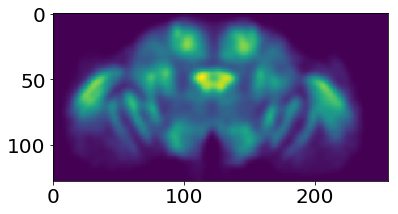

In [38]:
plt.imshow(gaussian_filter(all_colored_by_betas,sigma=2)[10,:,:].T)

In [15]:
save_file = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20210419_3d_viewing_play/test.nii"
nib.Nifti1Image(all_colored_by_betas, np.eye(4)).to_filename(save_file)

In [39]:
# want 128,256,49
all_colored_by_betas = gaussian_filter(np.swapaxes(all_colored_by_betas, 0, 2),sigma=2)

In [40]:
all_colored_by_betas.shape

(128, 256, 31)

In [78]:
func_iso = ants.resample_image(ants.from_numpy(all_colored_by_betas),(int(512*0.65), int(1024*0.65), int(256*1*(31/49))),1,1,).numpy()

In [18]:
func_iso.shape

(332, 665, 161)

In [42]:
save_file = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20210419_3d_viewing_play/test_3.nii"
nib.Nifti1Image(func_iso, np.eye(4)).to_filename(save_file)

### corr

In [43]:
dataset_path = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20210101_correlation/"

In [44]:
n_clusters = 2000
labels_file = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20201129_super_slices/final_9_cluster_labels_2000.npy'
cluster_model_labels = np.load(labels_file)

In [45]:
behaviors = ['Y_pos', 'Z_pos', 'Z_neg']
maps = {}
for behavior in behaviors:
    rvalues_to_load = [os.path.join(dataset_path, x) for x in os.listdir(dataset_path) if 'rvalues_{}'.format(behavior) in x]
    bbb.sort_nicely(rvalues_to_load)

    pvalues_to_load = [os.path.join(dataset_path, x) for x in os.listdir(dataset_path) if 'pvalues_{}'.format(behavior) in x]
    bbb.sort_nicely(pvalues_to_load)
    
    r_map = []
    p_map = []
    for z in range(49):
        r_map.append(np.load(rvalues_to_load[z]))
        p_map.append(np.load(pvalues_to_load[z]))

    r_map = np.asarray(r_map)
    p_map = np.asarray(p_map)
    
    final_map = []
    for z in range(49):
        colored_by_betas = np.zeros(256*128)
        for cluster_num in range(n_clusters):
            cluster_indicies = np.where(cluster_model_labels[z,:]==cluster_num)[0]

            if p_map[z,cluster_num] <= 1e-8 :
                sig = 1
            else:
                sig = 0

            if len(cluster_indicies) > 100:
                sig = np.nan
            colored_by_betas[cluster_indicies] = r_map[z,cluster_num]*sig
        colored_by_betas = colored_by_betas.reshape(256,128)
        final_map.append(colored_by_betas)
    final_map = np.asarray(final_map)
    maps[behavior] = final_map

In [68]:
norm_min = 0
norm_max = np.max(np.nan_to_num(maps['Y_pos']))
norm_max = 0.15
slices = []
for z in range(49):
    colors1 = Normalize(norm_min, norm_max)(maps['Z_neg'][z,:,:].T)
    colors2 = Normalize(norm_min, norm_max)(maps['Z_pos'][z,:,:].T)
    colors3 = Normalize(norm_min, norm_max)(maps['Y_pos'][z,:,:].T)
    to_plot = np.stack((colors1,colors2,colors3),axis=2)
    slices.append(to_plot)
slices = np.asarray(slices)

In [69]:
slices.shape

(49, 128, 256, 3)

In [70]:
# want 128,256,49

In [71]:
slices = np.swapaxes(slices, 0, 3)
slices.shape

(3, 128, 256, 49)

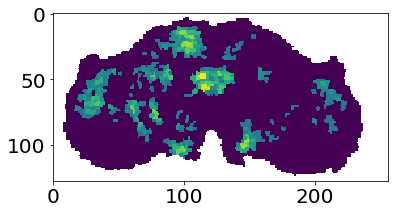

In [73]:
plt.imshow(slices[1,:,:,20])

In [107]:
func_iso = ants.resample_image(ants.from_numpy(slices[1,:,:,:]),(int(512*0.65), int(1024*0.65), int(256*1)),1,1,).numpy()

In [108]:
func_iso = np.nan_to_num(func_iso)

In [109]:
func_iso = gaussian_filter(func_iso,sigma=4)

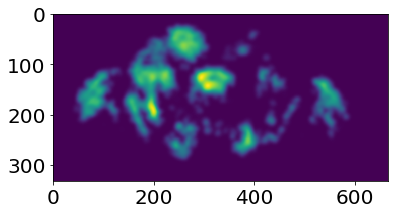

In [110]:
plt.imshow(func_iso[:,:,100])

In [111]:
save_file = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20210419_3d_viewing_play/test_5.nii"
nib.Nifti1Image(func_iso, np.eye(4)).to_filename(save_file)

In [98]:
res_LUKE = (0.65, 0.65, 1)
load_file = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/anat_templates/luke.nii'
anatomy = np.asarray(nib.load(load_file).get_data().squeeze(), dtype='float32')

In [99]:
anatomy.shape

(1024, 512, 256)

In [102]:
# Want 512,1024,256
anatomy = np.swapaxes(anatomy,0,1)
print(anatomy.shape)

(512, 1024, 256)


In [104]:
anat_iso = ants.resample_image(ants.from_numpy(anatomy),(int(512*0.65), int(1024*0.65), int(256*1)),1,0).numpy()

In [106]:
save_file = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20210419_3d_viewing_play/anatomy.nii"
nib.Nifti1Image(anat_iso, np.eye(4)).to_filename(save_file)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

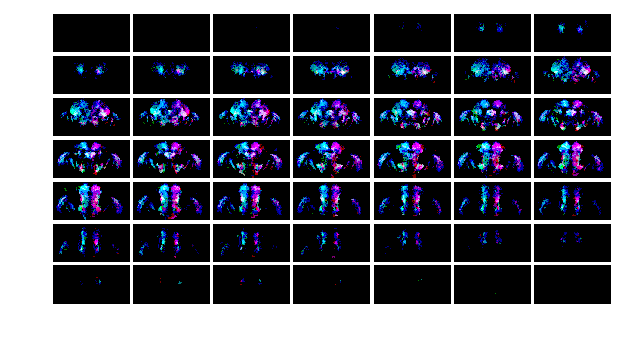

In [48]:
fig = plt.figure(figsize=(10,10))
grid = ImageGrid(fig, 111, nrows_ncols=(7, 7), axes_pad=.05)
for i in range(49):
    grid[i].imshow(slices[i][:,:,:]*2);
    grid[i].axis('off')
    
save_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/figs'
timestr = time.strftime("%Y%m%d-%H%M%S")
fname = os.path.join(save_path, f'{timestr}')
#plt.savefig(fname,dpi=300,bbox_inches='tight')